# Assignment on Multiple Linear regression

In [9]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# read the data
df = pd.read_csv(r"D:\Assignments\Multilinear regression\ToyotaCorolla.csv",header=0,encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA and Data Visualization¶

In [11]:
df.shape

(1436, 38)

In [12]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [14]:
df.describe(include='all')

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,NaN,NaN,NaN,NaN,NaN,Petrol,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,107,NaN,NaN,NaN,NaN,NaN,1264,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,721.555014,NaN,10730.824513,55.947075,5.548747,1999.625348,68533.259749,NaN,101.502089,0.674791,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,NaN,3626.964585,18.599988,3.354085,1.540722,37506.448872,NaN,14.981080,0.468616,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,NaN,4350.000000,1.000000,1.000000,1998.000000,1.000000,NaN,69.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,NaN,8450.000000,44.000000,3.000000,1998.000000,43000.000000,NaN,90.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,NaN,9900.000000,61.000000,5.000000,1999.000000,63389.500000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,NaN,11950.000000,70.000000,8.000000,2001.000000,87020.750000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000


In [15]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [16]:
for i in df:
    print(df[i].unique())

[   1    2    3 ... 1440 1441 1442]
['TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'
 '\xa0TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'
 'TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors'
 '\xa0TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors'
 'TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors'
 '\xa0TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors'
 '\xa0TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors'
 'TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors'
 'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors'
 'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors'
 '\xa0TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors'
 '\xa0TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/3-Doors'
 'TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors'
 '\xa0TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR SOL AUT4 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors'
 '\xa0TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors'
 '\xa0TOYOTA Corol

In [17]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [18]:
df1[df1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [19]:
df1=df1.drop_duplicates().reset_index(drop=True)
df1


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [20]:
import plotly.express as px
import plotly.graph_objects as go

In [25]:
figure = px.scatter(x=df1['Price'], y=df1['Weight'])
# displaying the figure instance
figure.show()

In [32]:
fig = px.histogram(df1.Price, x="Price")
fig.show()

In [33]:
fig = px.pie(df1, values="Price", names="Doors")
fig.show()

In [34]:
figure = px.scatter(x=df1['Price'], y=df1['HP'])
# displaying the figure instance
figure.show()

In [37]:
figure = px.scatter(x=df1['Price'], y=df1['Age_08_04'])
# displaying the figure instance
figure.show()

In [38]:
figure = px.scatter(x=df1['Price'], y=df1['KM'])
# displaying the figure instance
figure.show()

# Correlation Analysis

In [39]:
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot: >

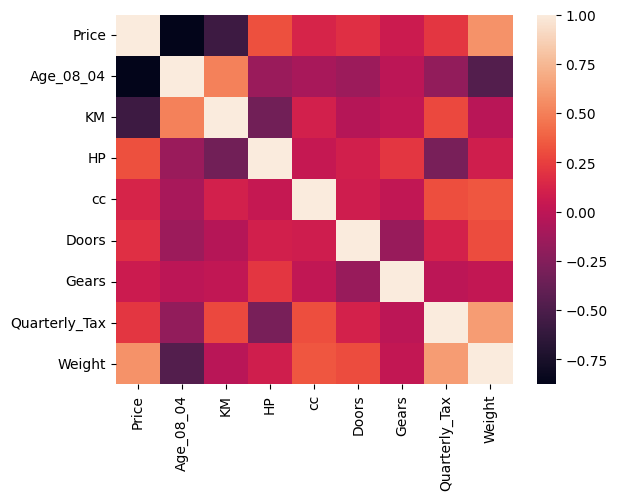

In [40]:
cor = df1.corr()
sns.heatmap(cor)

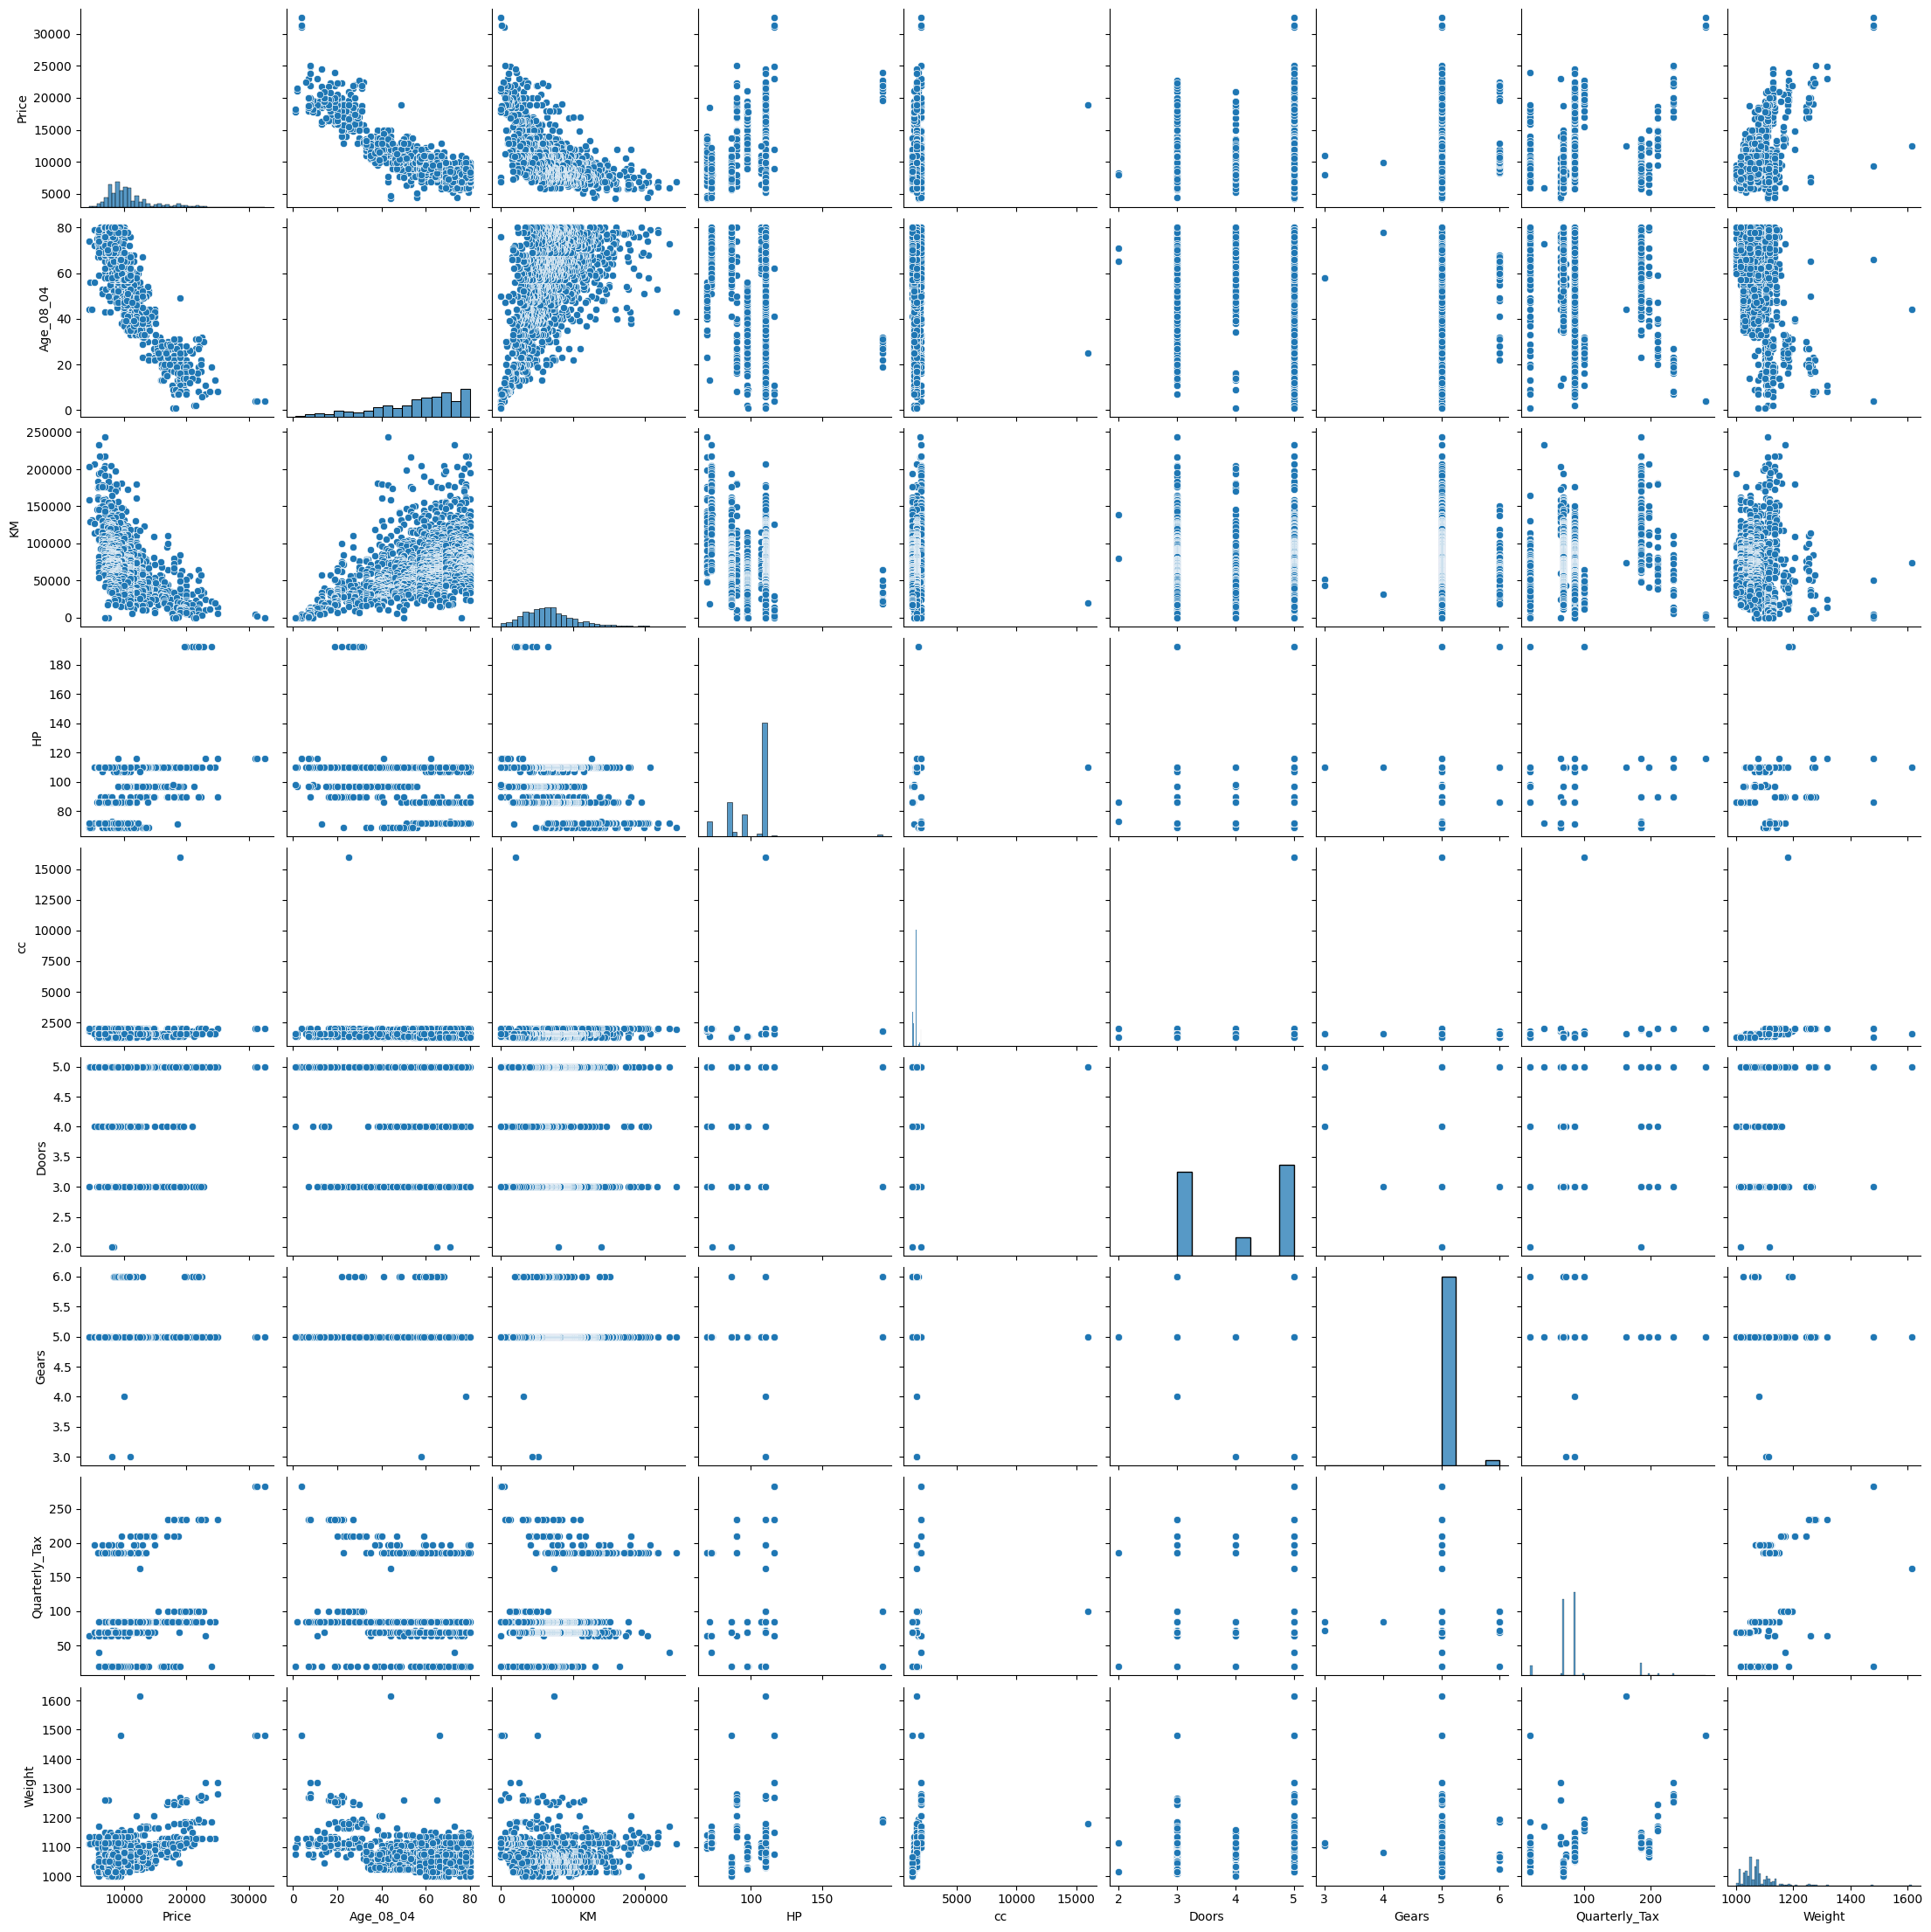

In [41]:
sns.pairplot(df1)

<AxesSubplot: xlabel='HP', ylabel='Price'>

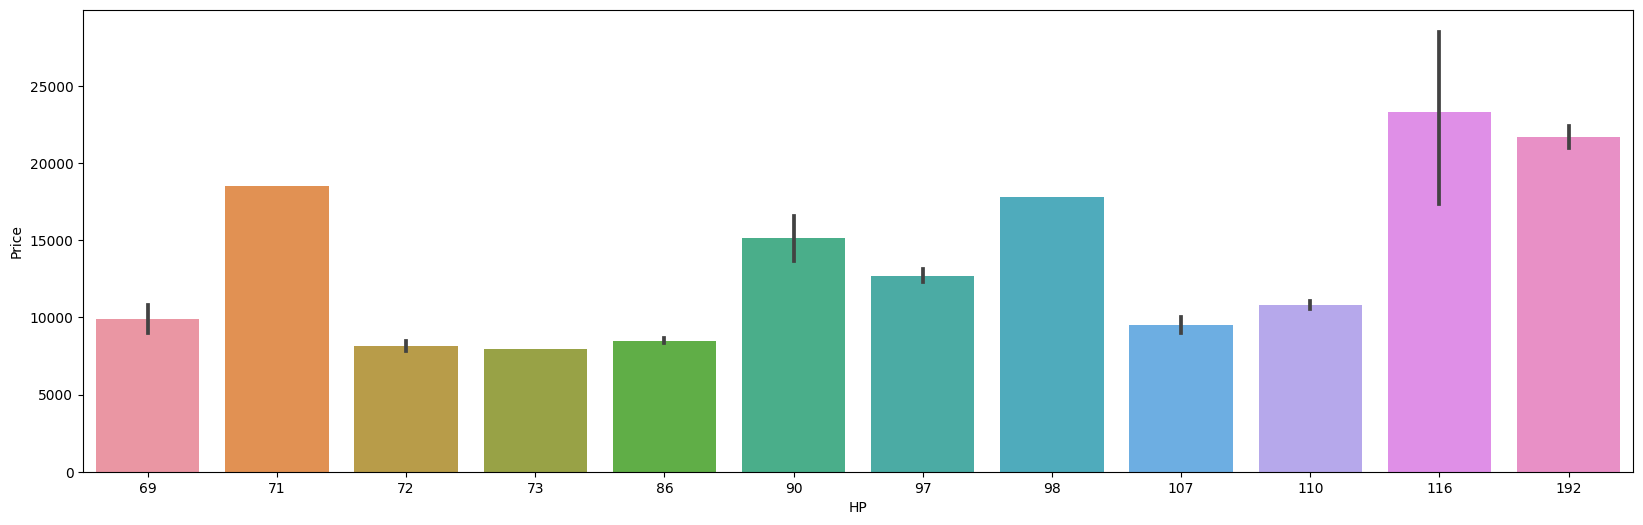

In [42]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1.HP, y=df1['Price'])

<AxesSubplot: xlabel='Age_08_04', ylabel='Price'>

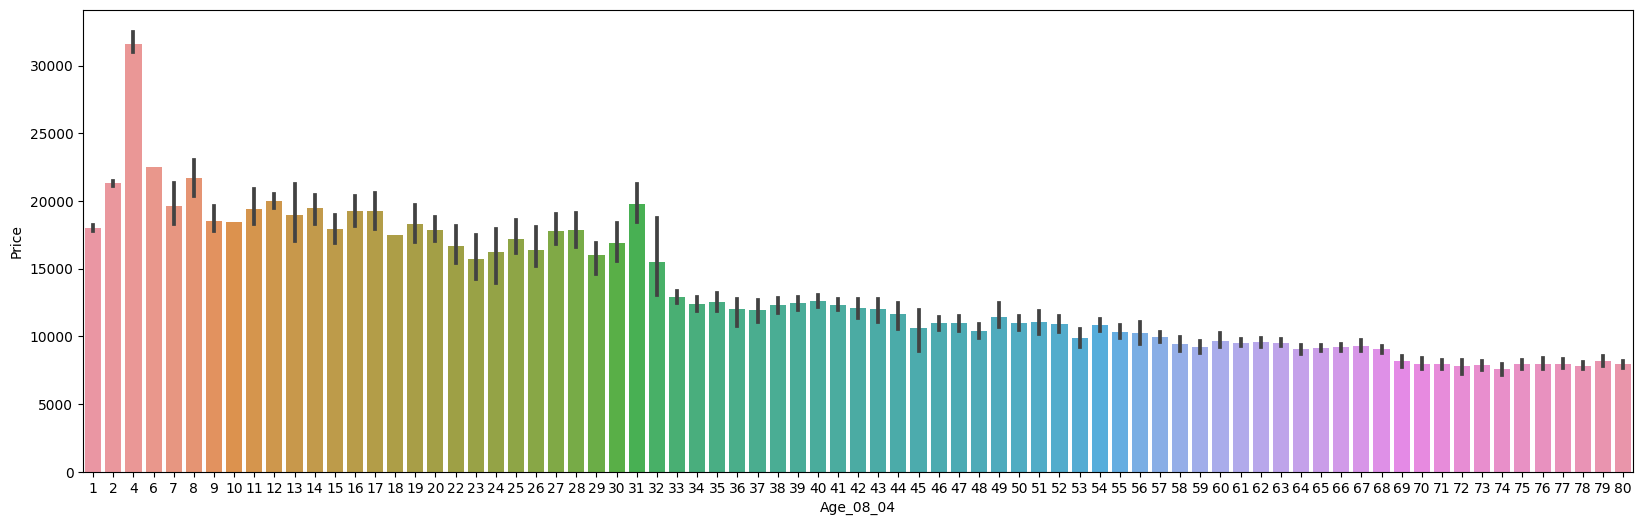

In [43]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1.Age_08_04, y=df1['Price'])

<AxesSubplot: xlabel='cc', ylabel='Price'>

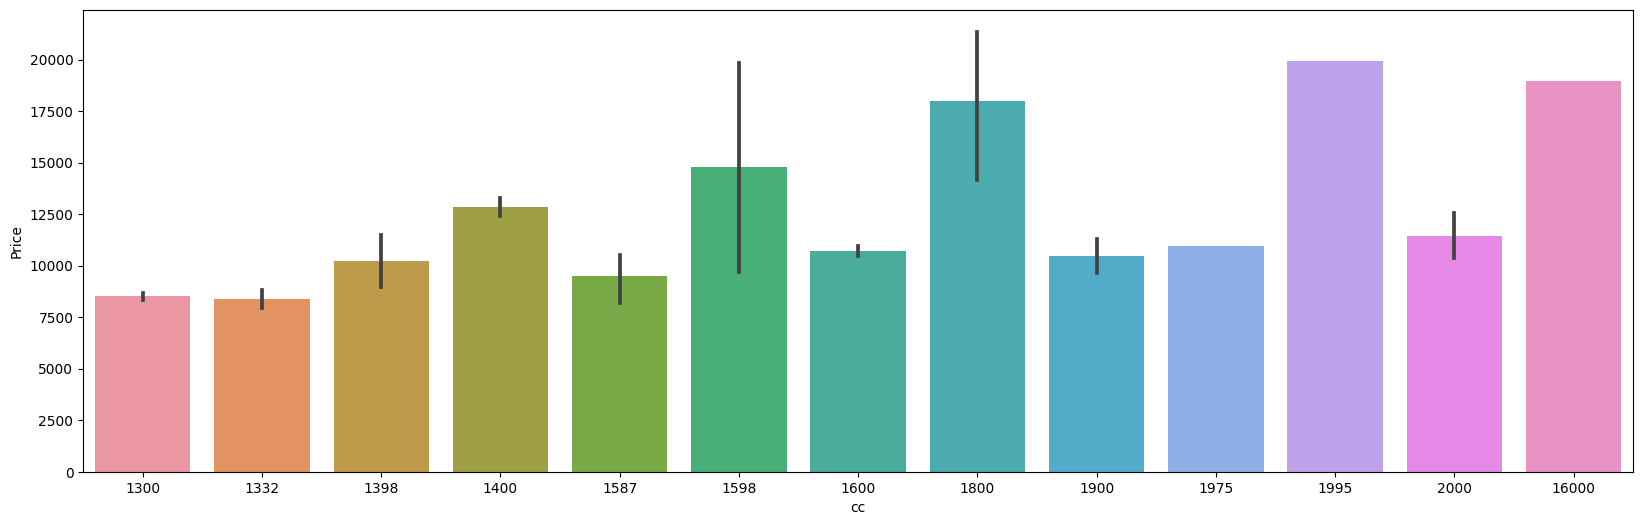

In [44]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1.cc, y=df1['Price'])

<AxesSubplot: xlabel='Doors', ylabel='Price'>

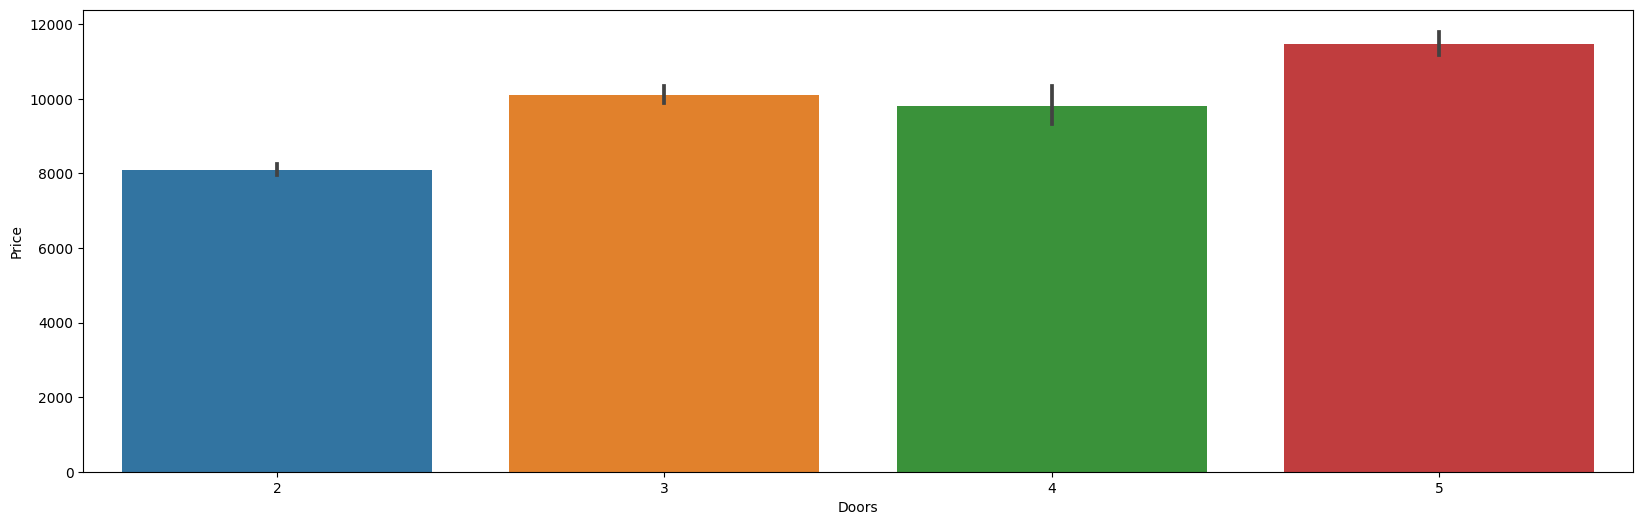

In [45]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1.Doors, y=df1['Price'])

<AxesSubplot: xlabel='Gears', ylabel='Price'>

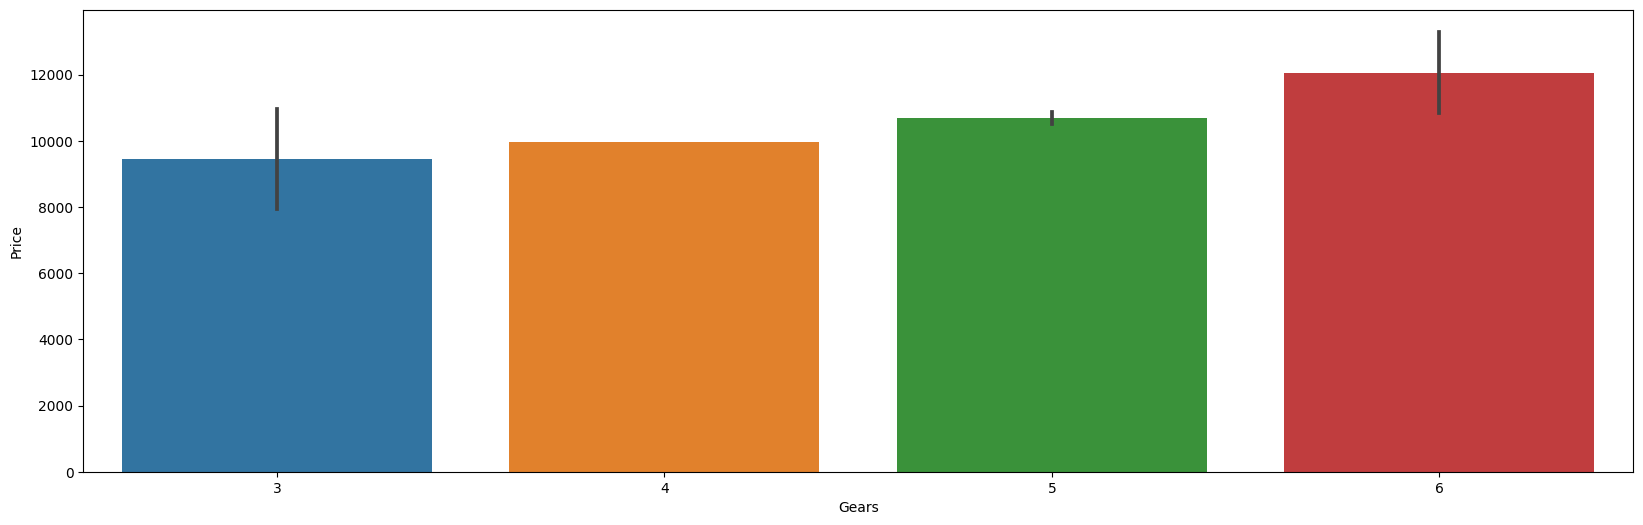

In [46]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1.Gears, y=df1['Price'])

# Scatterplot between variables along with histograms

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df1,diag_kind="kde")
plt.show()

Observations:
Relation between input variables (Age and KM ) - Multicolinarity
price (output/dependent variable) is depend on all independent variables

# Preparing a model

In [47]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [48]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:01:19   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Coefficeient
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [51]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


Variable Doors and CC are insignificant to predict the MPG because p-value is greater than significant level (0.05) so we are accepting the null hypothesis.
Variable others than cc and Doors are significant to predict the MPG because p-value is less than significant level (0.05) so we are rejecting the null hypothesis.

In [52]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~ Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1279.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:02:52   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5473.6812   1410.804     -3.880      0.000   -8241.154   -2706.209
Age_08_04      -121.7137      2.614    -46.568      0.000    -126.841    -116.587
KM               -0.0207      0.001    -16.566      0.000      -0.023      -0.018
HP               31.5800      2.810     11.240      0.000      26.069      37.091
cc               -0.1185      0.090     -1.317      0.188      -0.295       0.058
Gears           598.5773    193.312      3.096      0.002     219.371     977.784
Quarterly_Tax     3.8611      1.307      2.955      0.003       1.298       6.424
Weight           16.8493      1.035     16.283      0.000      14.819      18.879
==============================================================================
Omnibus:                      149.544   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.121
Skew:                          -0.204   Prob(JB):                    1.11e-217
Kurtosis:                       7.067   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.879831
Age_08_04       -46.568324
KM              -16.565951
HP               11.240407
cc               -1.316697
Gears             3.096427
Quarterly_Tax     2.955175
Weight           16.283225
dtype: float64 
 Intercept         1.092917e-04
Age_08_04        1.180642e-288
KM                1.639817e-56
HP                3.781194e-28
cc                1.881516e-01
Gears             1.996828e-03
Quarterly_Tax     3.176180e-03
Weight            8.262172e-55
dtype: float64


In [54]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~ Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1491.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:02:55   Log-Likelihood:                -12367.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1428   BIC:                         2.479e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5377.5177   1409.274     -3.816      0.000   -8141.988   -2613.048
Age_08_04      -121.7555      2.614    -46.576      0.000    -126.883    -116.628
KM               -0.0209      0.001    -16.695      0.000      -0.023      -0.018
HP               31.2400      2.798     11.164      0.000      25.751      36.729
Gears           601.6857    193.347      3.112      0.002     222.410     980.961
Quarterly_Tax     3.6483      1.297      2.813      0.005       1.104       6.192
Weight           16.6298      1.022     16.280      0.000      14.626      18.634
==============================================================================
Omnibus:                      146.220   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.315
Skew:                          -0.193   Prob(JB):                    4.87e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [55]:
model = smf.ols('Price~ Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:03:01   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Dell\AppData\Local\Temp\ipykernel_26280\2663006812.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: ylabel='Density'>

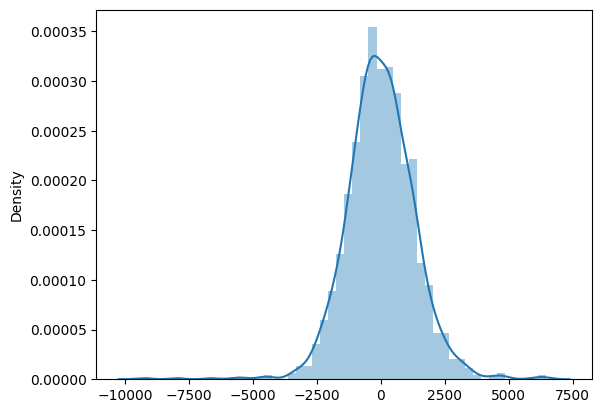

In [57]:
sns.distplot(list(model.resid))

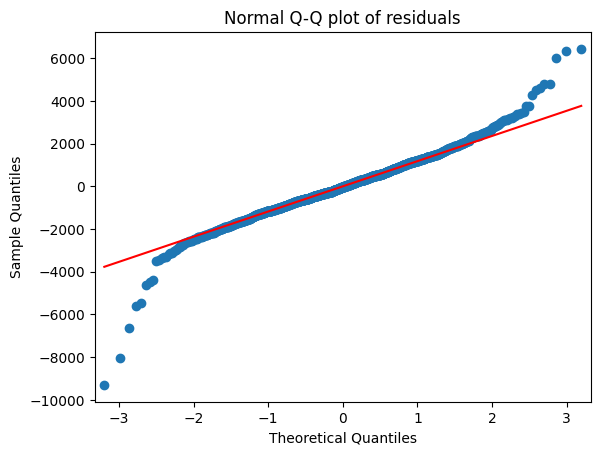

In [58]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

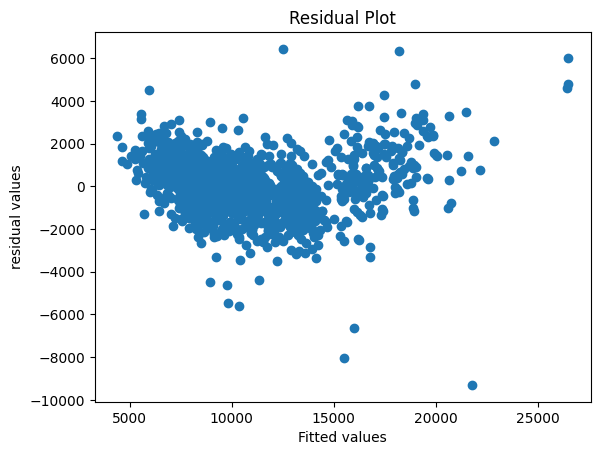

In [59]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('residual values')
plt.show()

In [60]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

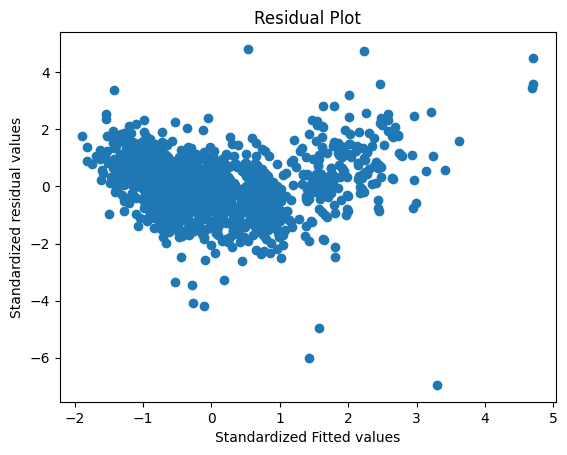

In [61]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

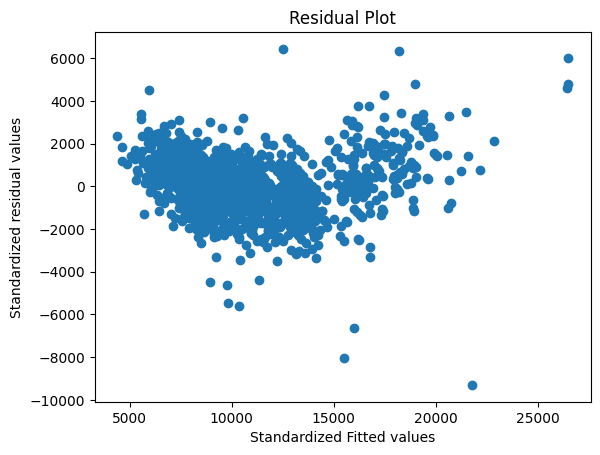

In [62]:
plt.scatter(model.fittedvalues,
            model.resid)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


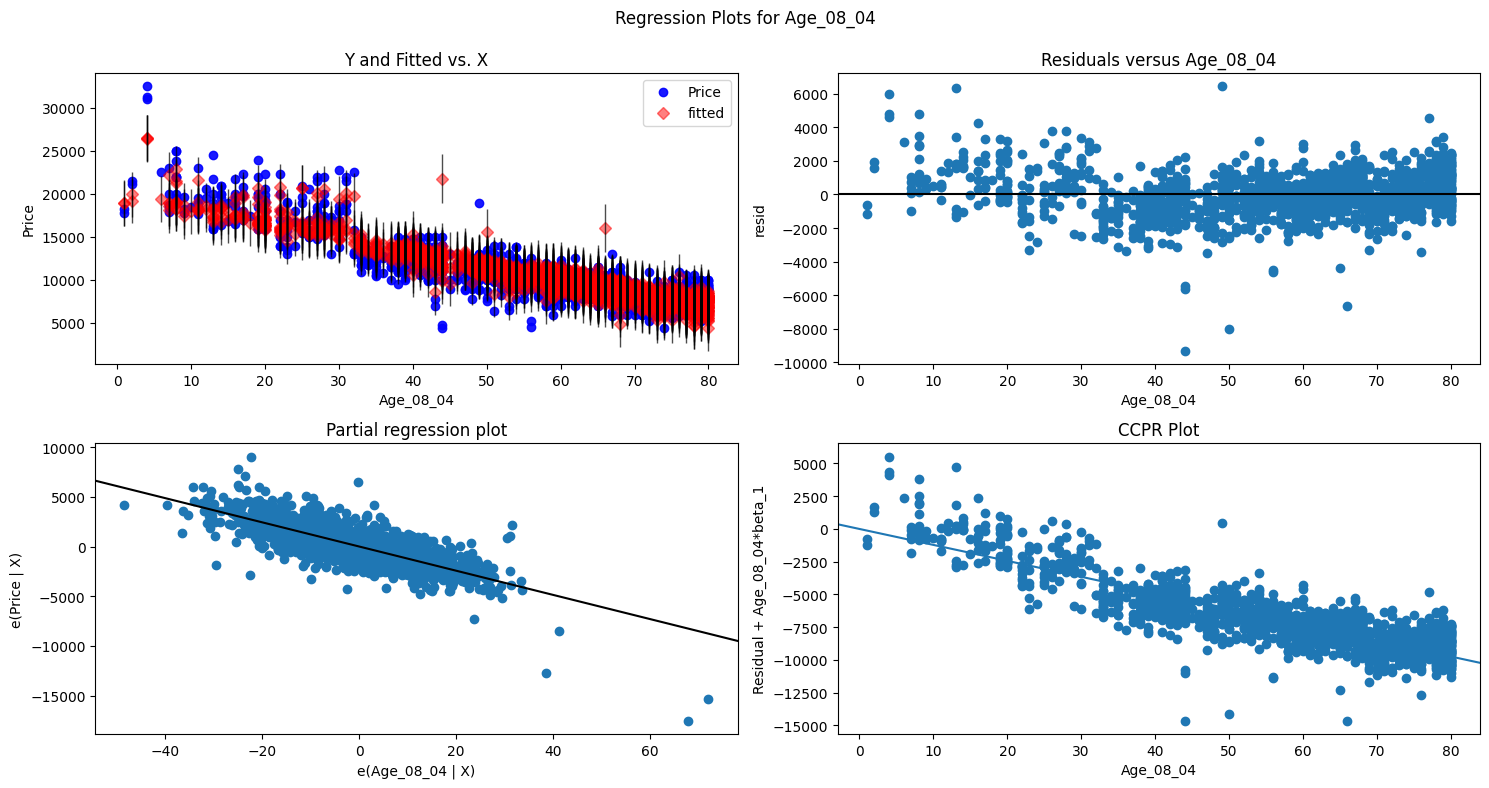

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


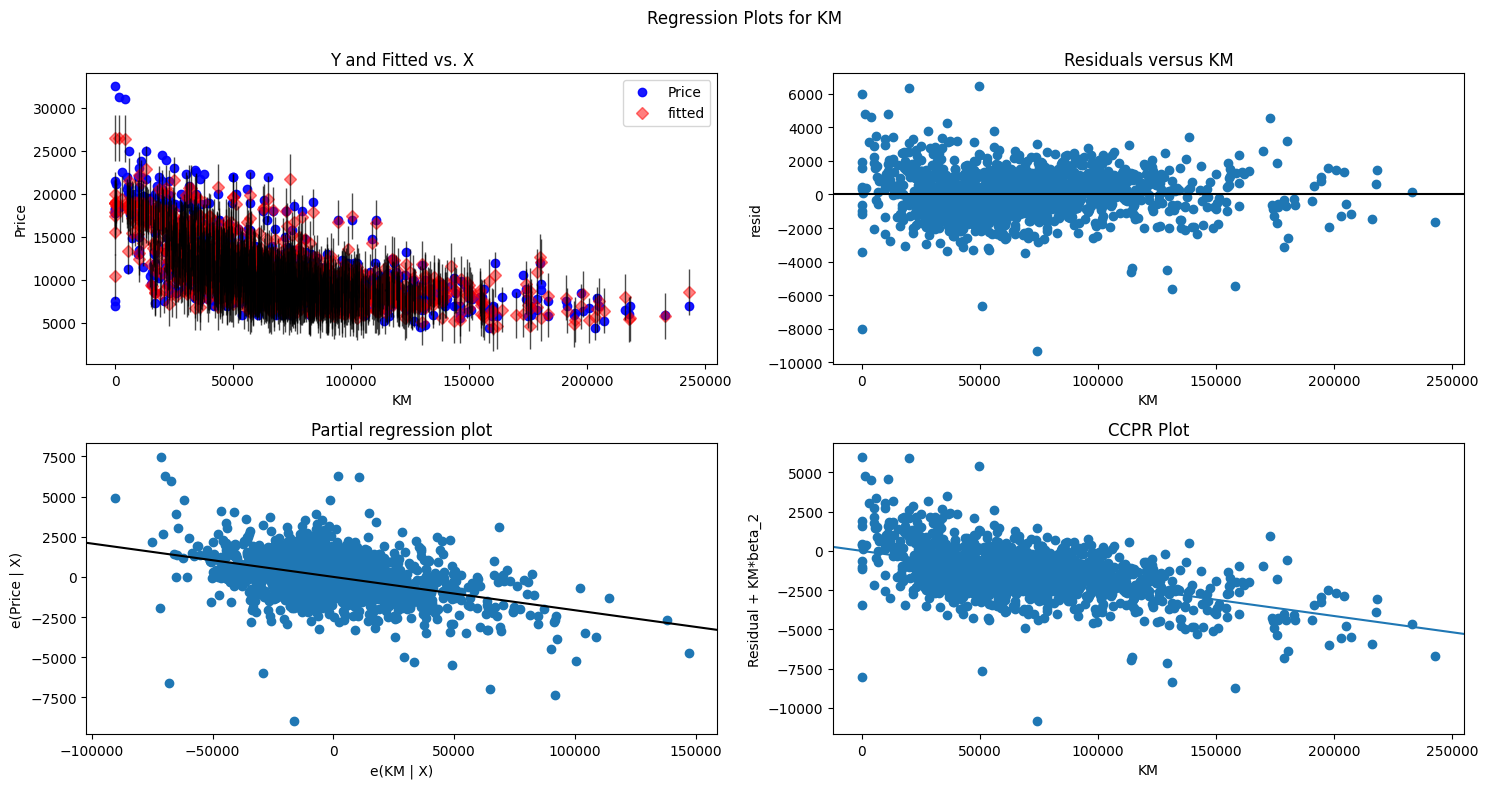

In [64]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()


# Model Deletion Diagnostics:
    Detecting influencer/outliers
    
Method1: Cooks distance

In [65]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

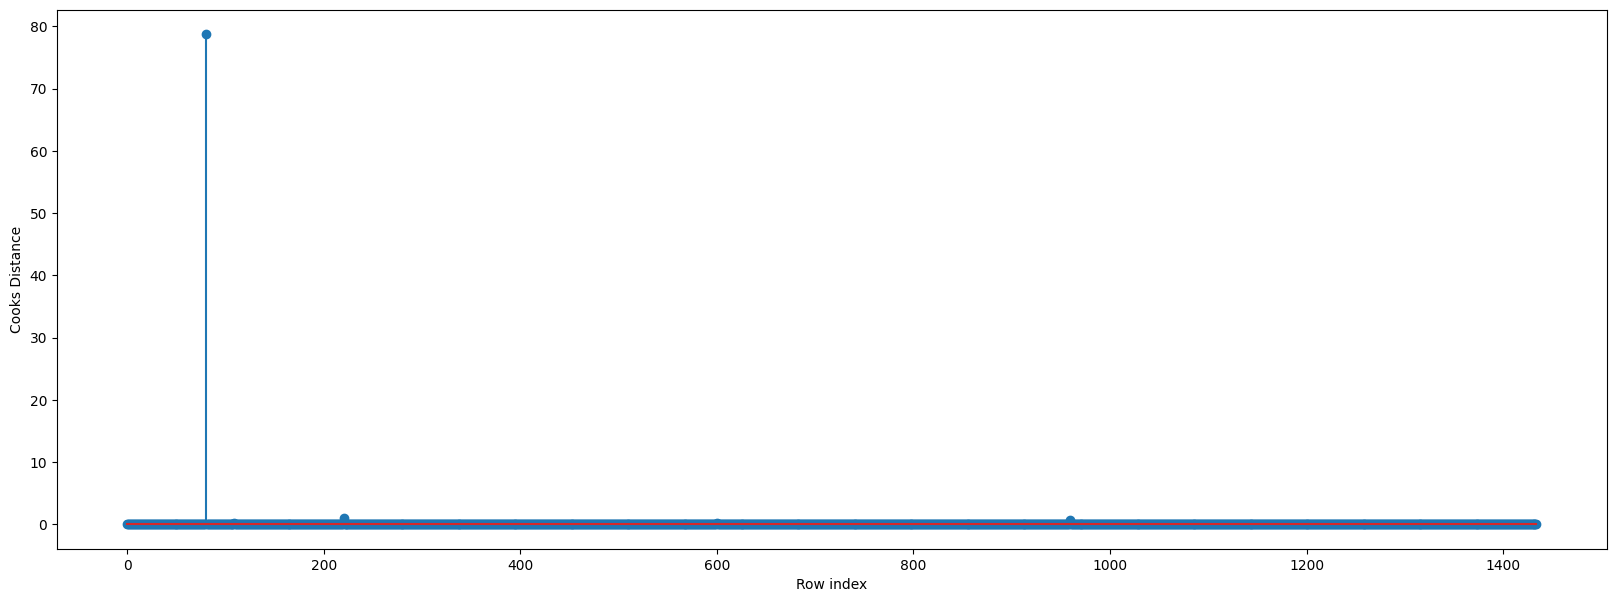

In [66]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582257006)

# High Influence points

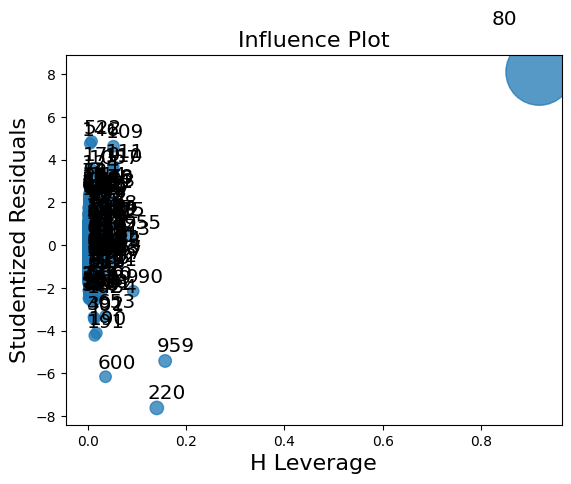

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [70]:
df1[df1.index.isin([80])] 

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [71]:
dfnew=df1.copy()
dfnew

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [72]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df2=dfnew.drop(dfnew.index[[80]],axis=0).reset_index(drop=True)
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Build Model

In [73]:
model = smf.ols('Price~ Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1485.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:06:24   Log-Likelihood:                -12358.
No. Observations:                1434   AIC:                         2.473e+04
Df Residuals:                    1427   BIC:                         2.477e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5334.3035   1409.906     -3.783      0.000   -8100.014   -2568.593
Age_08_04      -121.7419      2.614    -46.570      0.000    -126.870    -116.614
KM               -0.0208      0.001    -16.676      0.000      -0.023      -0.018
HP               31.2640      2.798     11.172      0.000      25.775      36.753
Gears           602.2722    193.347      3.115      0.002     222.998     981.546
Quarterly_Tax     3.6796      1.297      2.837      0.005       1.135       6.224
Weight           16.5790      1.023     16.210      0.000      14.573      18.585
==============================================================================
Omnibus:                      145.028   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              951.051
Skew:                          -0.186   Prob(JB):                    3.03e-207
Kurtosis:                       6.972   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
(model.rsquared,model.aic,model.bic)

(0.8619510108025968, 24730.881683155287, 24767.759244303405)

In [75]:
model2 = smf.ols('Price~ KM+HP+Gears+Quarterly_Tax+Weight',data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     535.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          4.94e-324
Time:                        10:06:26   Log-Likelihood:                -13021.
No. Observations:                1434   AIC:                         2.605e+04
Df Residuals:                    1428   BIC:                         2.609e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.944e+04   2081.092    -14.146      0.000   -3.35e+04   -2.54e+04
KM               -0.0527      0.002    -31.801      0.000      -0.056      -0.049
HP               25.9971      4.437      5.859      0.000      17.293      34.701
Gears           753.3764    306.767      2.456      0.014     151.613    1355.139
Quarterly_Tax     8.0737      2.053      3.933      0.000       4.047      12.101
Weight           34.1751      1.508     22.661      0.000      31.217      37.133
==============================================================================
Omnibus:                      231.119   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1996.545
Skew:                          -0.474   Prob(JB):                         0.00
Kurtosis:                       8.702   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
(model2.rsquared,model2.aic,model2.bic)

(0.6521393422069381, 26054.174982336197, 26085.784320463154)

In [77]:
Model3=  smf.ols('Price~Age_08_04+HP+Gears+Quarterly_Tax+Weight',data=df2).fit()
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1446.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:06:30   Log-Likelihood:                -12486.
No. Observations:                1434   AIC:                         2.498e+04
Df Residuals:                    1428   BIC:                         2.502e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3587.7717   1536.382     -2.335      0.020   -6601.579    -573.964
Age_08_04      -145.6392      2.389    -60.960      0.000    -150.326    -140.953
HP               40.2291      3.001     13.406      0.000      34.342      46.116
Gears           378.0956    210.763      1.794      0.073     -35.343     791.534
Quarterly_Tax    -1.9990      1.368     -1.462      0.144      -4.682       0.684
Weight           15.5285      1.115     13.921      0.000      13.340      17.717
==============================================================================
Omnibus:                      122.638   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.186
Skew:                          -0.154   Prob(JB):                    1.33e-145
Kurtosis:                       6.327   Cond. No.                     4.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Predictions

In [ ]:
# say New data for prediction is
new_data=pd.DataFrame({'Age_08_04':10,"KM":50000,"HP":60,"cc":1200,"Doors":4,"Gears":6,"Quarterly_Tax":60,"Weight":1000},index=[0])
new_data

In [ ]:
# Manual Prediction 
model.predict(new_data)

# model Building using SKlearn

In [ ]:
# Create X and Y

In [ ]:
df1.columns

In [ ]:
X=df1[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight']]

In [ ]:
X

In [ ]:
Y=df1[['Price']]

In [ ]:
Y

In [ ]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)

In [ ]:
X.hist(bins=20)

In [ ]:
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

In [ ]:
X.hist(bins=20)

In [ ]:
print(X)

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)  


# Build Model

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

In [ ]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

In [ ]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual_Profit"]=Y_test
new_df["Predicted_Profit"]=Y_pred
new_df

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

In [ ]:
# writing dat into new excel file
new_df["Deviation"]=new_df["Actual_Profit"]-new_df["Predicted_Profit"]
#new_df.to_excel("Profit Prediction.xlsx",header=True,index=True)
new_df.head()

# Conclusion

# model OLS all parameters
R-squared:0.863
Adj. R-squared:0.862

# Model OLS:without Doors
R-squared:0.863
Adj. R-squared:0.863
    
# Model OLS: without Doors and CC
R-squared:0.862
Adj. R-squared: 0.861
    
# Model OLS: without Age, Doors and CC
R-squared:652
Adj. R-squared:651 # so Age is important parameter
    
# Model OLS: without KM,  Doors and CC we can achieve good accuracy
R-squared:0.835
Adj. R-squared:0.834 
    
# model sklearn
R-squared:0.8618879362836092
Adj. R-squared:0.861113114046771